# Machine learning for the working (biomedical) researcher
### Marco Chierici
### _Data scientist @ FBK/MPBA_


In this handout we will go through basic concepts of machine learning using Scikit-learn and the SEQC neuroblastoma data set [Zhang et al, _Genome Biology_, 2015].

In particular, we will focus on a subset of 272 samples (136 training, 136 test), aiming at predicting an extreme disease outcome (favorable vs unfavorable samples: see main paper).

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Display plots within the notebook
%matplotlib inline

Load the training set data:

In [3]:
data_tr = pd.read_csv("data/nb_train.txt.gz", dtype=str, sep='\t', index_col=0)

Now let's have a look at the data. First, the dimensions:

In [4]:
data_tr.shape

(136, 16394)

What's inside?

A peek at the first rows reveals that the first column (the dataframe **index**) contains the sample IDs, the second column is the class (or target), and the remaining columns are genes:

In [5]:
data_tr.head()

,class,15E1.2,2'-PDE,7A5,A2BP1,A2LD1,A2M,A3GALT2,A4GALT,A4GNT,...,hCG_2036596,hCG_2040556,hCG_2041321,hCG_21078,hCG_24378,tcag7.1017,tcag7.1196,tcag7.1239,tcag7.441,tcag7.875
sampleID,,,,,,,,,,,,,,,,,,,,,
NB001,1,10.4660823398966,8.12017940297329,7.65443720698381,10.0509080936873,8.20309820315593,14.4182624953688,7.51202989461802,8.17290332404157,7.83674377743448,...,7.51427397967379,12.2240233524329,11.3010379662009,17.1946446746712,7.78734355655343,9.68634138868197,9.62790886926591,9.77045663004416,11.0687940866714,7.74871674908621
NB003,1,10.0433806860637,8.17757422776342,7.42951341977216,8.67841313806572,8.56271420871427,14.5628912915083,7.89664935622847,7.90598157605612,7.87573751350664,...,7.41531094816195,11.6086762093186,12.9891229767417,16.824937483969,7.84091838053438,9.50610762719161,8.59908771310479,10.6914122158131,11.7762324667686,7.59113129409545
NB005,1,10.2530057854764,8.56140102139205,7.60193363768839,10.1466351236573,9.18055741255828,14.9116225840734,7.32180800135239,8.6364756582801,7.82212069015117,...,7.36341271714929,11.8507685690258,11.6897370967802,16.9400103259564,8.15341832373068,9.26875829786858,8.75437759170207,9.62973528075936,11.393549157041,7.76212488528048
NB011,-1,9.84423602402605,8.10487703077007,7.63407268165348,11.3806517869924,8.1950865978724,16.2796120252589,7.27944016720415,9.07148956663966,7.71679418945883,...,7.41413578241194,12.4242682189311,10.0039830692432,16.4270752279569,7.9263325217217,9.439537729823,9.03795971887767,9.27385566422298,10.484150552028,7.60977795233417
NB013,1,10.3727277348889,8.1403882657906,7.40405497125135,10.1629373821085,8.53913808430587,16.3779439700201,7.56607110930906,8.63973444135234,7.76226318695502,...,7.3467715034459,12.160724006206,10.7894971055621,16.3510886481422,7.75716621036852,9.68754006399885,9.87856572648481,9.41046362378246,9.976622132251,7.50900041046079


We can access the sample IDs...

In [6]:
data_tr.index

Index(['NB001', 'NB003', 'NB005', 'NB011', 'NB013', 'NB017', 'NB019', 'NB021',
       'NB023', 'NB025',
       ...
       'NB407', 'NB417', 'NB421', 'NB471', 'NB473', 'NB475', 'NB479', 'NB493',
       'NB495', 'NB497'],
      dtype='object', name='sampleID', length=136)

... and the column names:

In [7]:
data_tr.columns

Index(['class', '15E1.2', '2'-PDE', '7A5', 'A2BP1', 'A2LD1', 'A2M', 'A3GALT2',
       'A4GALT', 'A4GNT',
       ...
       'hCG_2036596', 'hCG_2040556', 'hCG_2041321', 'hCG_21078', 'hCG_24378',
       'tcag7.1017', 'tcag7.1196', 'tcag7.1239', 'tcag7.441', 'tcag7.875'],
      dtype='object', length=16394)

For the remaining part of this hands-on, we need the data to be stored in a Numpy array:

In [8]:
data_tr.values

array([['1', '10.4660823398966', '8.12017940297329', ...,
        '9.77045663004416', '11.0687940866714', '7.74871674908621'],
       ['1', '10.0433806860637', '8.17757422776342', ...,
        '10.6914122158131', '11.7762324667686', '7.59113129409545'],
       ['1', '10.2530057854764', '8.56140102139205', ...,
        '9.62973528075936', '11.393549157041', '7.76212488528048'],
       ..., 
       ['-1', '10.7036121907914', '8.42702475206297', ...,
        '8.91154367794673', '11.0976939394133', '7.78686127608124'],
       ['-1', '10.3028795005347', '8.45896335302739', ...,
        '8.85007775037209', '10.9116334161916', '7.6552693845856'],
       ['-1', '10.3380479968946', '8.38656507560188', ...,
        '9.14019817308736', '11.0500652343464', '7.9009225112065']], dtype=object)

This keeps the class column as well.

But...

We need to separate the class from the data, so let's recreate our array by dropping the class column from the original dataframe:

In [9]:
data_tr.values[:, 1:]

array([['10.4660823398966', '8.12017940297329', '7.65443720698381', ...,
        '9.77045663004416', '11.0687940866714', '7.74871674908621'],
       ['10.0433806860637', '8.17757422776342', '7.42951341977216', ...,
        '10.6914122158131', '11.7762324667686', '7.59113129409545'],
       ['10.2530057854764', '8.56140102139205', '7.60193363768839', ...,
        '9.62973528075936', '11.393549157041', '7.76212488528048'],
       ..., 
       ['10.7036121907914', '8.42702475206297', '7.43950137883741', ...,
        '8.91154367794673', '11.0976939394133', '7.78686127608124'],
       ['10.3028795005347', '8.45896335302739', '7.42238170822497', ...,
        '8.85007775037209', '10.9116334161916', '7.6552693845856'],
       ['10.3380479968946', '8.38656507560188', '7.4919361204715', ...,
        '9.14019817308736', '11.0500652343464', '7.9009225112065']], dtype=object)

Let's set the dtype to float and save the array to x_tr:

In [10]:
x_tr = data_tr.values[:, 1:].astype(float)

In [11]:
x_tr

array([[ 10.46608234,   8.1201794 ,   7.65443721, ...,   9.77045663,
         11.06879409,   7.74871675],
       [ 10.04338069,   8.17757423,   7.42951342, ...,  10.69141222,
         11.77623247,   7.59113129],
       [ 10.25300579,   8.56140102,   7.60193364, ...,   9.62973528,
         11.39354916,   7.76212489],
       ..., 
       [ 10.70361219,   8.42702475,   7.43950138, ...,   8.91154368,
         11.09769394,   7.78686128],
       [ 10.3028795 ,   8.45896335,   7.42238171, ...,   8.85007775,
         10.91163342,   7.65526938],
       [ 10.338048  ,   8.38656508,   7.49193612, ...,   9.14019817,
         11.05006523,   7.90092251]])

Save the class column in another Numpy integer array:

In [12]:
y_tr = data_tr["class"].values.astype(int)

In [13]:
y_tr

array([ 1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

---

### Quick recap

- y_tr = 1 indicates **unfavorable** neuroblastoma samples (**bad** outcome)
- y_tr = -1 indicates **favorable** neuroblastoma samples (**good** outcome)

---

Extract feature and sample names:

In [14]:
feat_tr = data_tr.columns[1:].values.astype(str)
samp_tr = data_tr.index.values.astype(str)

In [15]:
samp_tr

array(['NB001', 'NB003', 'NB005', 'NB011', 'NB013', 'NB017', 'NB019',
       'NB021', 'NB023', 'NB025', 'NB027', 'NB029', 'NB031', 'NB033',
       'NB035', 'NB037', 'NB039', 'NB043', 'NB045', 'NB047', 'NB049',
       'NB051', 'NB053', 'NB055', 'NB057', 'NB059', 'NB069', 'NB071',
       'NB095', 'NB097', 'NB099', 'NB101', 'NB105', 'NB111', 'NB115',
       'NB119', 'NB121', 'NB123', 'NB125', 'NB131', 'NB137', 'NB139',
       'NB141', 'NB145', 'NB147', 'NB149', 'NB151', 'NB153', 'NB155',
       'NB157', 'NB159', 'NB161', 'NB165', 'NB167', 'NB169', 'NB171',
       'NB183', 'NB185', 'NB195', 'NB197', 'NB199', 'NB203', 'NB205',
       'NB207', 'NB209', 'NB211', 'NB213', 'NB215', 'NB217', 'NB219',
       'NB225', 'NB229', 'NB237', 'NB245', 'NB255', 'NB257', 'NB259',
       'NB263', 'NB267', 'NB269', 'NB271', 'NB275', 'NB277', 'NB279',
       'NB281', 'NB283', 'NB287', 'NB289', 'NB291', 'NB299', 'NB301',
       'NB303', 'NB305', 'NB307', 'NB315', 'NB317', 'NB319', 'NB321',
       'NB323', 'NB3

Now load the test set data in a Pandas dataframe and create the Numpy arrays for data and labels.

In [ ]:
# Your code here...

In [ ]:
# %load sol1.py

In [ ]:
x_ts.shape

# Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
z_tr = pca.fit_transform(x_tr)

In [19]:
print(pca.explained_variance_ratio_)

[ 0.15726095  0.08871027]


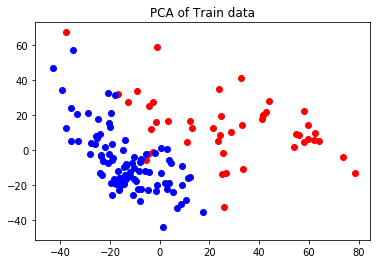

In [20]:
plt.figure()
plt.scatter(z_tr[y_tr == 1, 0], z_tr[y_tr == 1, 1], color="r")
plt.scatter(z_tr[y_tr == -1, 0], z_tr[y_tr == -1, 1], color="b")
plt.title("PCA of Train data")
plt.show()

Apply the transformation to the test data:

In [21]:
z_ts = pca.transform(x_ts)

NameError: name 'x_ts' is not defined

In [22]:
plt.figure()
plt.scatter(z_ts[y_ts == 1, 0], z_ts[y_ts == 1, 1], color="r")
plt.scatter(z_ts[y_ts == -1, 0], z_ts[y_ts == -1, 1], color="b")
plt.title("PCA transformation applied to Test data")
plt.show()

NameError: name 'z_ts' is not defined

# Supervised Learning

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred = clf.predict(x_ts)

NameError: name 'x_ts' is not defined

## Feature ranking

We will sort the features according to the Random Forest importances (Gini impurity index), and make a simple stem plot of the first 10.

In [ ]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(10):
    print("%d. feature %s (%f)" % (f + 1, feat_tr[indices[f]], importances[indices[f]]))


In [ ]:
plt.figure()
plt.title("Feature importances")
plt.stem(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), feat_tr[indices[:10]], rotation="vertical")
plt.xlim([-1, 10])
plt.show()

## Evaluating performance

Compute and print the confusion matrix.

### Recap

In this example, the first row is class -1, so the confusion matrix will look like:

|      |  |  Predicted  |    |
|------|-----------|----|----|
|      |           | -1 | 1  |
| True | -1        | TN | FP |
|      | 1         | FN | TP |


In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_ts, y_pred)
conf

The total number of class -1 test samples should be equal to the sum of the first row of the confusion matrix, i.e., TN + FP:

In [ ]:
np.sum(y_ts==-1)

Similarly for class 1, i.e., FN + TP:

In [ ]:
np.sum(y_ts==1)

Compute the Accuracy, remembering the formula: 

ACC = (TN + TP) / (TN + TP + FN + FP)

TN and TP are on the main diagonal of our conf Numpy array.

In [ ]:
(conf[0,0] + conf[1,1])/y_ts.shape[0]

Luckily Scikit-learn provides a quite handy alternative:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, y_pred)

Compute the MCC (again, Scikit-learn comes to our help):

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_ts, y_pred)

# Data partitioning

Simple random split of a dataset in two groups (hold-out strategy), leaving 25% of the samples for model evaluation:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.25, random_state=0)

## Cross-validation

Split the training dataset, x_tr, with a 5-fold partitioning schema, keeping the class label proportions across folds:

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

N = skf.get_n_splits(x_tr, y_tr)

for i, (idx_tr, idx_ts) in enumerate(skf.split(x_tr, y_tr)):
    print("Fold %d / %d" % (i+1, N))
    X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
    X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
    print("TRAIN size:", X_train.shape[0])
    print("-- class 1:", np.sum(Y_train==1), "class -1:", np.sum(Y_train==-1))
    print("TEST size:", X_test.shape[0])
    print("-- class 1:", np.sum(Y_test==1), "class -1:", np.sum(Y_test==-1))
    print()


## Implementing a basic Data Analysis Protocol

As a final example, we implement a 10x 5-fold Cross-validation schema with a simple feature ranking. 

For each CV iteration, a Random Forest model is trained on the training portion of the data, then features are ranked according to the Random Forest importances; a series of Random Forest models are built upon an increasing number of the ranked features (i.e., 1, 5, 10, etc.) and evaluated on the test data in terms of MCC.

The average MCC over the 10x5 CV iterations is computed for the different feature set sizes. We choose the feature set size that maximizes the average MCC.

This basic example is meant as a starting point for building more complex pipelines, i.e., with more feature steps, (bootstrapped) confidence intervals for MCC, computation of a unified ranked feature list (as in Jurman et al., _Bioinformatics_, 2008).

In [ ]:
CV_N = 10 # number of CV iterations
CV_K = 5 # number of CV folds
FEATURE_STEPS = [1, 5, 10, 25, 50, 100]
# prepare output MCC array
MCC = np.empty((CV_K*CV_N, len(FEATURE_STEPS)))
         

In [ ]:
for n in range(CV_N):
    print("~~~ Iteration %d ~~~" % (n+1))
    skf = StratifiedKFold(n_splits=CV_K, shuffle=True, random_state=n)
    for i, (idx_tr, idx_ts) in enumerate(skf.split(x_tr, y_tr)):
        print("Fold %d" % (i+1))
        X_train, Y_train = x_tr[idx_tr], y_tr[idx_tr]
        X_test, Y_test = x_tr[idx_ts], y_tr[idx_ts]
        
        clf = RandomForestClassifier(n_estimators=500, random_state=n)
        clf.fit(X_train, Y_train)
        ranking = np.argsort( clf.feature_importances_ )[::-1]
        
        for j, s in enumerate(FEATURE_STEPS):
            v = ranking[:s] # consider the top s ranked features
            X_tr_fs, X_ts_fs = X_train[:, v], X_test[:, v] # extract them from internal train and test data
            clf.fit(X_tr_fs, Y_train) # train a classifier on the reduced train dataset
            YP = clf.predict(X_ts_fs) # predict on the reduced test dataset
            MCC[(n*CV_K)+i, j] = matthews_corrcoef(Y_test, YP) # evaluate the model performance
        
    print()


In [ ]:
np.save("MCC_CV", MCC)
# MCC = np.load("MCC_CV.npy")

In [ ]:
MCC_avg = np.mean(MCC, axis=0)
MCC_max = np.max(MCC_avg)
n_feats = FEATURE_STEPS[np.argmax(MCC_avg)]

In [ ]:
# average MCC for each feature step
for nf, mcc in zip(FEATURE_STEPS, MCC_avg):
    print("nf = %d, MCC = %.2f" % (nf, mcc))

print()

print("Best MCC = %.2f with %d features" % (MCC_max, n_feats))


In [ ]:
plt.figure()
plt.title("Average MCC")
plt.plot(FEATURE_STEPS, MCC_avg, 'o-')
plt.xlabel("Feature steps")
plt.ylabel("MCC")
plt.show()